Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fraud_check.csv")

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
#We will create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [6]:
#We will take high sales above at 7.49 beacause it is the average of sales
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [7]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [8]:
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [9]:
data["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [12]:
model = RandomForestClassifier(n_estimators=110, max_features=3)

In [13]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
from sklearn import metrics

In [15]:
Y_pred=model.predict(x_train)

In [16]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


In [17]:
model.score(x_train, y_train)

1.0

In [18]:
y_pred=model.predict(x_test)

In [19]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7388888888888889


In [20]:
model.score(x_test, y_test)

0.7388888888888889

In [21]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

City.Population    0.529521
Work.Experience    0.289118
Marital.Status     0.077773
Urban              0.053680
Undergrad          0.049908
dtype: float64

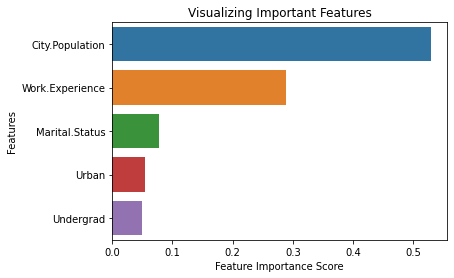

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [23]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,5):
    model=RandomForestClassifier(n_estimators=110, max_features=max_features)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [24]:
data = pd.DataFrame({'max_features':range(1,5),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.705556
1,2,1.0,0.750000
2,3,1.0,0.755556
3,4,1.0,0.744444


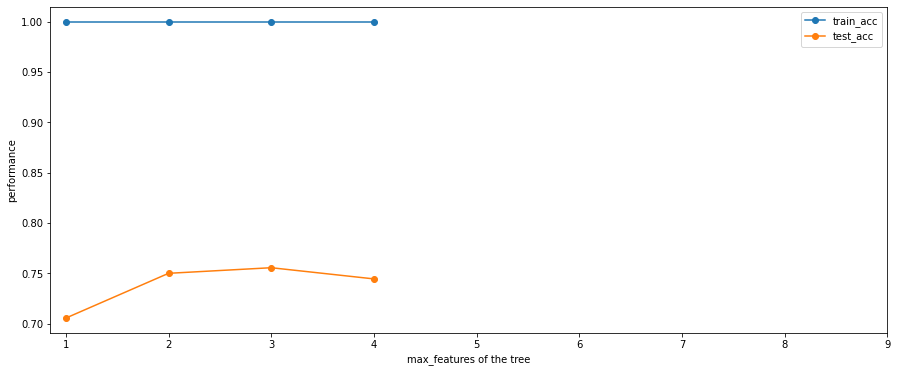

In [25]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = 'o')
plt.plot(data['max_features'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  2,  36],
       [ 11, 131]])

Text(0.5, 1.0, 'Accuracy Score: 0.7444444444444445')

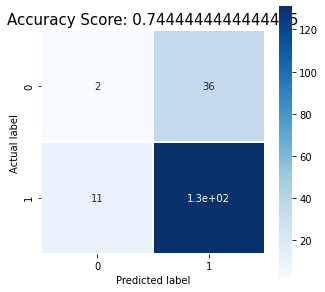

In [27]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [28]:
# Predicting the values of test data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.17      0.05      0.08        38
           1       0.79      0.93      0.85       142

    accuracy                           0.74       180
   macro avg       0.48      0.49      0.47       180
weighted avg       0.66      0.74      0.69       180



In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.model_selection import KFold

In [31]:
kfold=KFold(n_splits=8,random_state=7)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [32]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7366666666666666


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [34]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7916666666666666


In [35]:
model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=7)

In [36]:
from sklearn import metrics

In [37]:
Y_pred=model.predict(x_train)

In [38]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 0.7976190476190477


In [39]:
model.score(x_train, y_train)

0.7976190476190477

In [40]:
y_pred=model.predict(x_test)

In [41]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7833333333333333
